In [56]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [57]:
## loading in the training data
## original df
train_ames = pd.read_csv("./datasets/train.csv")

In [58]:
## loading in testing data
## original df
testing_ames = pd.read_csv("./datasets/test.csv")

In [59]:
train_ames.shape

(2051, 81)

In [60]:
testing_ames.shape

(878, 80)

In [61]:
### What column is in train that is not in test?

set(train_ames) - set(testing_ames)

{'SalePrice'}

In [62]:
## data cleaning

In [63]:
## set Id column to be our new index for both training and test
train_ames.set_index("Id", inplace=True)
testing_ames.set_index("Id", inplace=True)

In [64]:
train_ames.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [65]:
train_ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [66]:
## how many null values in training set
train_ames.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 80, dtype: int64

In [67]:
## does not include condition 1 or condition 2

features_one_train = train_ames[["PID","MS SubClass", "MS Zoning","Lot Area", "Street", "Alley","Lot Shape","Lot Config", 
                      "Neighborhood","Bldg Type", "House Style","Overall Qual", "Overall Cond", "Year Built", 
                      "Year Remod/Add","SalePrice"]]

In [68]:
features_one_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PID             2051 non-null   int64 
 1   MS SubClass     2051 non-null   int64 
 2   MS Zoning       2051 non-null   object
 3   Lot Area        2051 non-null   int64 
 4   Street          2051 non-null   object
 5   Alley           140 non-null    object
 6   Lot Shape       2051 non-null   object
 7   Lot Config      2051 non-null   object
 8   Neighborhood    2051 non-null   object
 9   Bldg Type       2051 non-null   object
 10  House Style     2051 non-null   object
 11  Overall Qual    2051 non-null   int64 
 12  Overall Cond    2051 non-null   int64 
 13  Year Built      2051 non-null   int64 
 14  Year Remod/Add  2051 non-null   int64 
 15  SalePrice       2051 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 272.4+ KB


In [69]:
features_one_train.isnull().sum()

PID                  0
MS SubClass          0
MS Zoning            0
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Lot Config           0
Neighborhood         0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
SalePrice            0
dtype: int64

In [70]:
# gets only the numeric data from features one dataframe 
numeric_one_feats = features_one_train._get_numeric_data()

In [71]:
## looking at the correlation matrix of features one 
numeric_one_feats.corr()

,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,SalePrice
PID,1.000000,-0.003632,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.255052
MS SubClass,-0.003632,1.000000,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.087335
Lot Area,0.024135,-0.245484,1.000000,0.105824,-0.019185,0.036002,0.050771,0.296566
Overall Qual,-0.265863,0.035763,0.105824,1.000000,-0.082770,0.602964,0.584654,0.800207
Overall Cond,0.106861,-0.070141,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.097019
Year Built,-0.347039,0.035983,0.036002,0.602964,-0.370988,1.000000,0.629116,0.571849
Year Remod/Add,-0.176666,0.044836,0.050771,0.584654,0.042614,0.629116,1.000000,0.550370
SalePrice,-0.255052,-0.087335,0.296566,0.800207,-0.097019,0.571849,0.550370,1.000000


**conclusions** after looking at correlation betweeen price and feature above, I've decided to drop Overall condition, MS Subclass, street_pave (street,corr = 0.069), dropping all building, lot config vars, lot shape. 

## Dropping Columns based on corr matrix value

In [72]:
features_one_train.drop(columns = ["Lot Config", "MS SubClass"],inplace=True)

/Users/brianna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
features_one_train.drop(columns = ['MS Zoning'], inplace=True)

## making dummy columns & dropping cols based on work done in 01 notebook

In [74]:
features_one_train = pd.get_dummies(columns=["Neighborhood"],drop_first=True, data=features_one_train)

In [75]:
features_one_train.drop(columns=["Street", "Alley"], inplace=True)

In [76]:
features_one_train.drop(columns = ["Lot Shape", "Bldg Type", "House Style"], inplace=True)

In [77]:
features_one_train.drop(columns=["PID"], inplace=True)

In [78]:
features_one_train.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
109,13517,6,8,1976,2005,130500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
544,11492,7,5,1996,1997,220000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
153,7922,5,7,1953,2007,109000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,9802,5,5,2006,2007,174000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
255,14235,6,8,1900,1993,138500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## First Data Frame Complete; training data

This dataframe contains columns I thought to be highly correlated with sale price. 
I analyzed columns 1-20; all numeric and categorical columns. I decided not to include house style in this DF

In [79]:
features_one_train 

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
109,13517,6,8,1976,2005,130500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
544,11492,7,5,1996,1997,220000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
153,7922,5,7,1953,2007,109000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,9802,5,5,2006,2007,174000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
255,14235,6,8,1900,1993,138500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,11449,8,5,2007,2007,298751,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
785,12342,4,5,1940,1950,82500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
916,7558,6,6,1928,1950,177000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


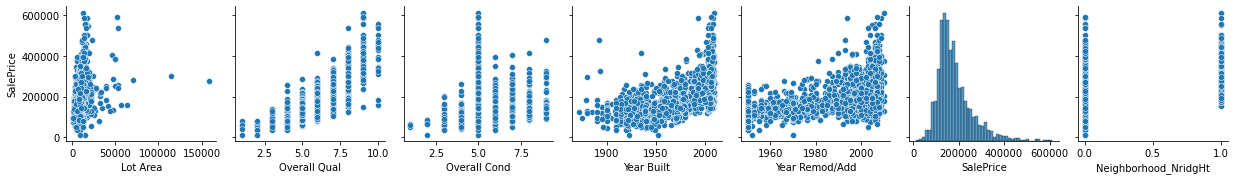

In [80]:
sns.pairplot(data=features_one_train, y_vars = ["SalePrice"], x_vars = ['Lot Area', 'Overall Qual', 'Overall Cond','Year Built', 'Year Remod/Add',
       'SalePrice', 'Neighborhood_NridgHt']);

## Second DataFrame


In [81]:
train_ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [82]:
all_numeric = train_ames._get_numeric_data()

In [83]:
all_numeric.isnull().sum()

PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [84]:
all_numeric[["Lot Frontage"]].mean()

Lot Frontage    69.0552
dtype: float64

In [85]:
all_numeric[["Lot Frontage"]]

,Lot Frontage
Id,
109,NaN
544,43.0
153,68.0
318,73.0
255,82.0
...,...
1587,79.0
785,NaN
916,57.0


In [86]:
median_lot_frontage = all_numeric["Lot Frontage"].median()

In [87]:
## I will replace NaN values in Lot Frontage with median value of all lot frontages which is 68.0
all_numeric["Lot Frontage"].fillna(median_lot_frontage, inplace=True)

In [88]:
median_gr_yr_blt = all_numeric["Garage Yr Blt"].median()

In [89]:
## I will replace NaN values in Lot Frontage with median value of all lot frontages which is 68.0
all_numeric["Garage Yr Blt"].fillna(median_gr_yr_blt, inplace=True)

In [90]:
all_numeric[["Garage Yr Blt"]].isnull().sum()

Garage Yr Blt    0
dtype: int64

In [91]:
## dropping these because I already looked at them and decided that I don't want to use them
all_numeric.drop(columns=["MS SubClass", "Overall Cond"], axis=1, inplace=True)

In [92]:
all_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   Lot Frontage     2051 non-null   float64
 2   Lot Area         2051 non-null   int64  
 3   Overall Qual     2051 non-null   int64  
 4   Year Built       2051 non-null   int64  
 5   Year Remod/Add   2051 non-null   int64  
 6   Mas Vnr Area     2029 non-null   float64
 7   BsmtFin SF 1     2050 non-null   float64
 8   BsmtFin SF 2     2050 non-null   float64
 9   Bsmt Unf SF      2050 non-null   float64
 10  Total Bsmt SF    2050 non-null   float64
 11  1st Flr SF       2051 non-null   int64  
 12  2nd Flr SF       2051 non-null   int64  
 13  Low Qual Fin SF  2051 non-null   int64  
 14  Gr Liv Area      2051 non-null   int64  
 15  Bsmt Full Bath   2049 non-null   float64
 16  Bsmt Half Bath   2049 non-null   float64
 17  Full Bath     

In [93]:
## also dropping these columns because they are in DF 1; where I cleaned the first 20 columns
all_numeric.drop(columns=["PID", "Lot Area", "Overall Qual", "Year Built", "Year Remod/Add"], inplace=True)

In [94]:
all_numeric.drop(columns=["BsmtFin SF 2", "Bsmt Unf SF", "Bsmt Half Bath", "Low Qual Fin SF","Bedroom AbvGr", 
                          "Kitchen AbvGr","Enclosed Porch", "3Ssn Porch","Screen Porch", "Pool Area", "Misc Val", "Mo Sold", 
                          "Yr Sold", "Kitchen AbvGr"],inplace=True)

In [95]:
all_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2051 non-null   float64
 1   Mas Vnr Area    2029 non-null   float64
 2   BsmtFin SF 1    2050 non-null   float64
 3   Total Bsmt SF   2050 non-null   float64
 4   1st Flr SF      2051 non-null   int64  
 5   2nd Flr SF      2051 non-null   int64  
 6   Gr Liv Area     2051 non-null   int64  
 7   Bsmt Full Bath  2049 non-null   float64
 8   Full Bath       2051 non-null   int64  
 9   Half Bath       2051 non-null   int64  
 10  TotRms AbvGrd   2051 non-null   int64  
 11  Fireplaces      2051 non-null   int64  
 12  Garage Yr Blt   2051 non-null   float64
 13  Garage Cars     2050 non-null   float64
 14  Garage Area     2050 non-null   float64
 15  Wood Deck SF    2051 non-null   int64  
 16  Open Porch SF   2051 non-null   int64  
 17  SalePrice       2051 non-null   i

In [96]:
all_numeric.isnull().sum()

Lot Frontage       0
Mas Vnr Area      22
BsmtFin SF 1       1
Total Bsmt SF      1
1st Flr SF         0
2nd Flr SF         0
Gr Liv Area        0
Bsmt Full Bath     2
Full Bath          0
Half Bath          0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        1
Garage Area        1
Wood Deck SF       0
Open Porch SF      0
SalePrice          0
dtype: int64

In [97]:
## going to fill the NaN with 0.0 since that is the median value
all_numeric[["Mas Vnr Area"]].median()

Mas Vnr Area    0.0
dtype: float64

In [98]:
all_numeric["Mas Vnr Area"].fillna(0.0,inplace=True)

In [99]:
all_numeric["BsmtFin SF 1"].fillna(0,inplace=True)

In [100]:
median_total_bsmt = all_numeric["Total Bsmt SF"].median()

In [101]:
all_numeric["Total Bsmt SF"].fillna(median_total_bsmt, inplace=True)

In [102]:
m_bfb = all_numeric["Bsmt Full Bath"].median()

In [103]:
all_numeric["Bsmt Full Bath"].fillna(m_bfb, inplace=True)

In [104]:
m_garage_cars = all_numeric["Garage Cars"].median()

In [105]:
all_numeric["Garage Cars"].fillna(m_garage_cars, inplace= True)

In [106]:
median_ga = all_numeric["Garage Area"].median()

In [107]:
all_numeric["Garage Area"].fillna(m_garage_cars, inplace= True)

### Adding some categorical data to second DF

In [108]:
## I am going to add kitchen quality to second df (using dummy vars); only cat value with high corr and 0 nulls.
all_numeric["Kitchen Qual"] = train_ames["Kitchen Qual"]

In [109]:
all_numeric = pd.get_dummies(columns=["Kitchen Qual"],drop_first=True, data=all_numeric)

In [110]:
features_one_train.drop(columns = ["SalePrice"], inplace=True)

In [111]:
## joining both dataframes
complete_train = all_numeric.join(features_one_train)

### First training DF

In [112]:
complete_train.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
109,68.0,289.0,533.0,725.0,725,754,1479,0.0,2,1,...,0,0,0,0,1,0,0,0,0,0
544,43.0,132.0,637.0,913.0,913,1209,2122,1.0,2,1,...,0,0,0,0,0,1,0,0,0,0
153,68.0,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
318,73.0,0.0,0.0,384.0,744,700,1444,0.0,2,1,...,0,0,0,0,0,0,0,0,1,0
255,82.0,0.0,0.0,676.0,831,614,1445,0.0,2,0,...,0,0,0,0,0,1,0,0,0,0


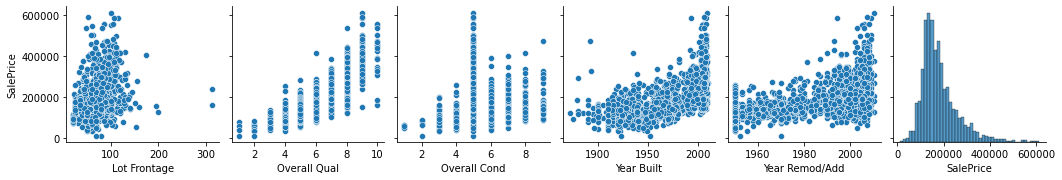

In [113]:
sns.pairplot(data=complete_train, y_vars = ["SalePrice"], x_vars = ['Lot Frontage', 'Overall Qual', 'Overall Cond','Year Built', 'Year Remod/Add',
       'SalePrice']);

In [115]:
log_sales = np.log(complete_train["SalePrice"])

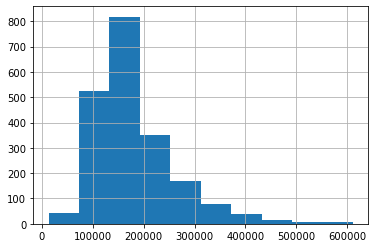

In [118]:
complete_train["SalePrice"].hist();

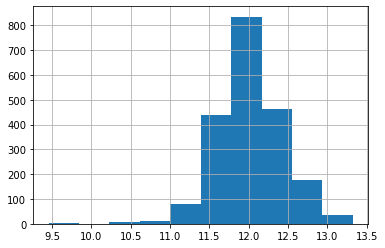

In [131]:
log_sales.hist();

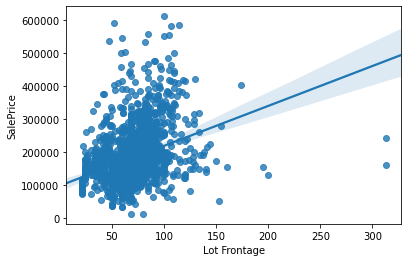

In [127]:
ax = sns.regplot(data=complete_train, x=complete_train["Lot Frontage"], y=complete_train["SalePrice"], fit_reg=True, truncate=False)

<AxesSubplot:xlabel='Lot Frontage', ylabel='SalePrice'>

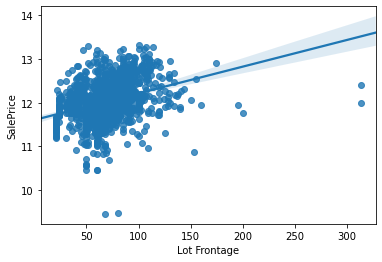

In [125]:
y_log = np.log(complete_train["SalePrice"])
sns.regplot(data=complete_train, x=complete_train["Lot Frontage"], y= y_log, fit_reg=True, truncate=False);

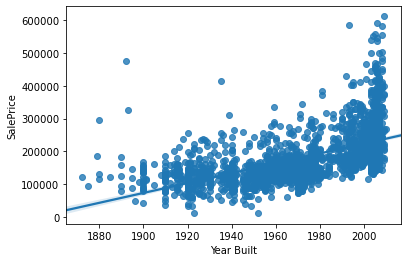

In [128]:
ax = sns.regplot(data=complete_train, x=complete_train['Year Built'], y=complete_train["SalePrice"], fit_reg=True, truncate=False)

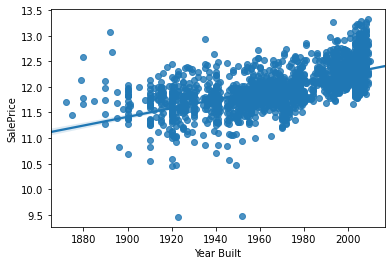

In [129]:
sns.regplot(data=complete_train, x=complete_train["Year Built"], y= y_log, fit_reg=True, truncate=False);